In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


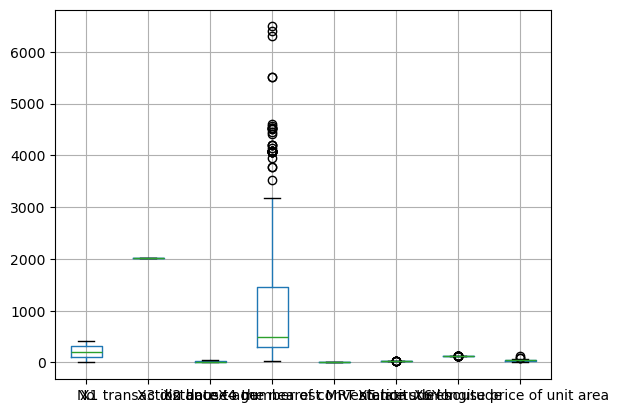

In [88]:
df.boxplot()
plt.show()

In [89]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [90]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [91]:
# Drop column : 'No' dan 'X1 transaction date' karena correlationnya <0.1 (hubungannya sangat lemah)
# Alasan ke 2 : No dan transaction date memang secara logika tidak mempengaruhi harga rumah terlalu banyak. 
# Meski pada hukum ekonomi, tanggal transaksi sangat mempengaruhi (Mengingat perkembangan zaman). Namun, pada data ini, tanggal tidak banyak berpengaruh

df = df.drop(columns=['No','X1 transaction date'])
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [92]:
df.dropna().count()
df = df.dropna()
df.dropna().count()
# Tidak ada data missing

X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

In [93]:
df.duplicated().sum()
#tidak ada data duplikasi juga

0

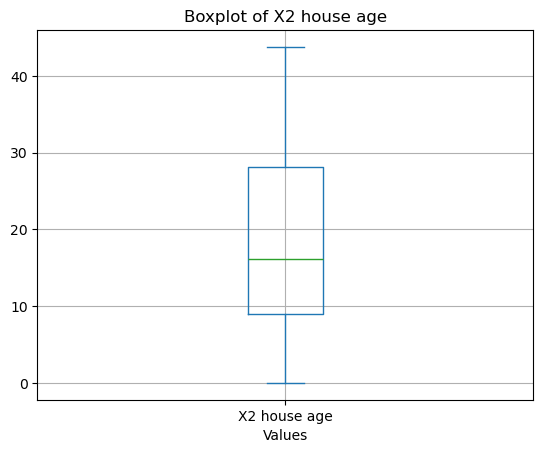

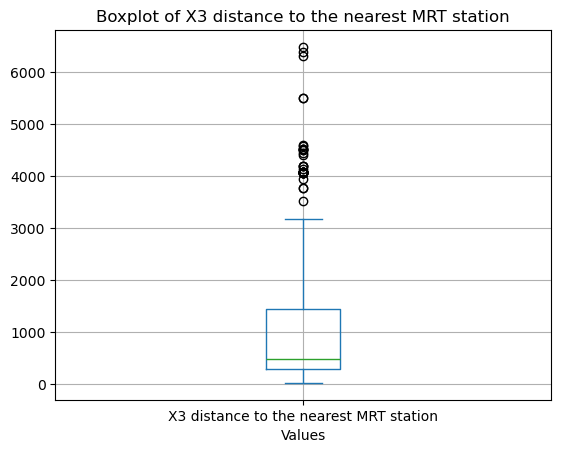

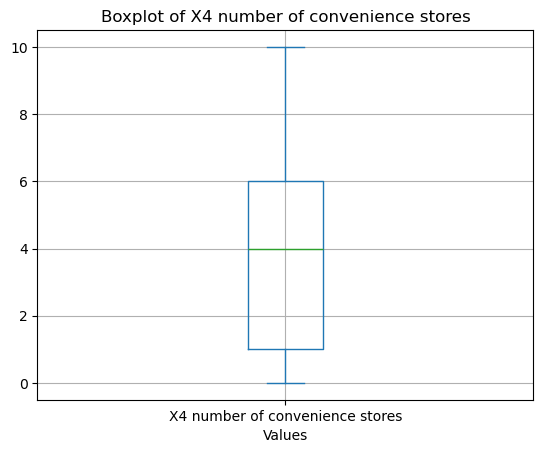

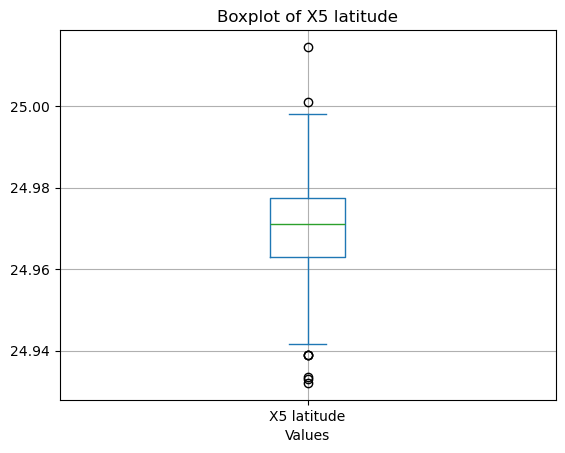

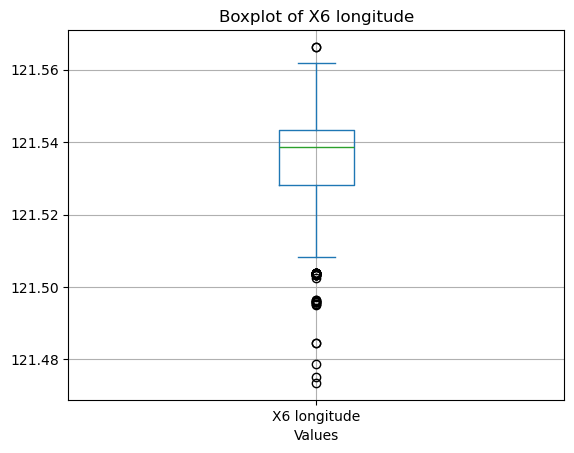

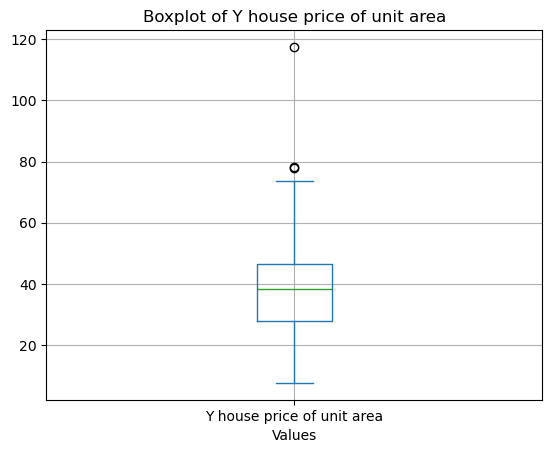

In [94]:
for column in df:
    df[column].plot(kind='box', grid=True)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Values')
    plt.show()

In [95]:
df.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


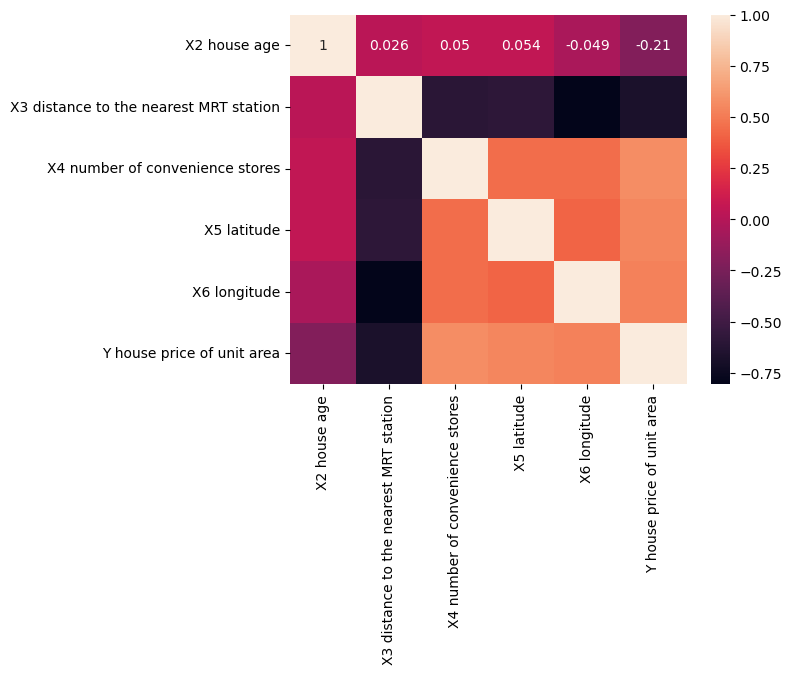

In [96]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

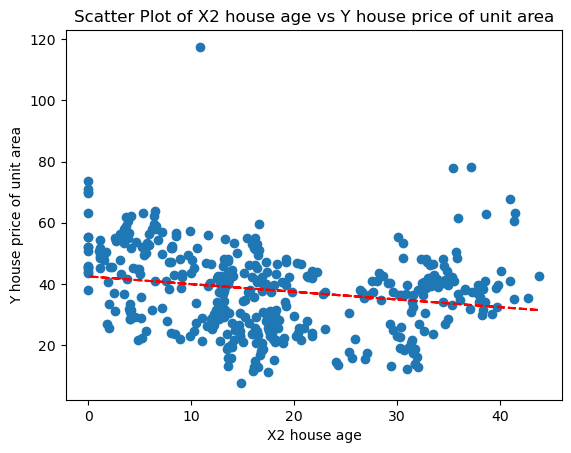

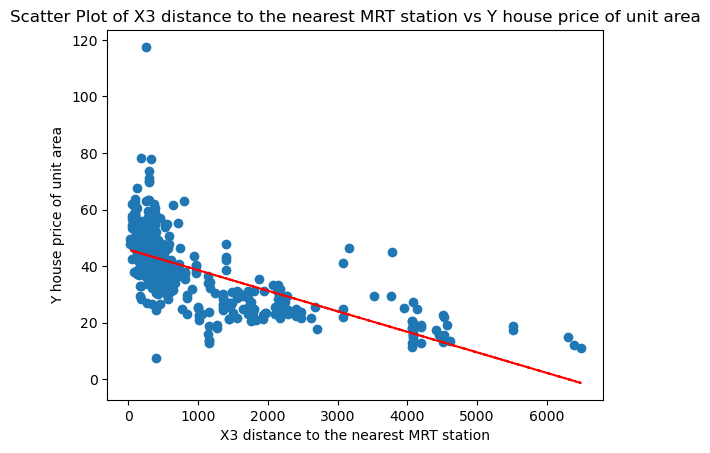

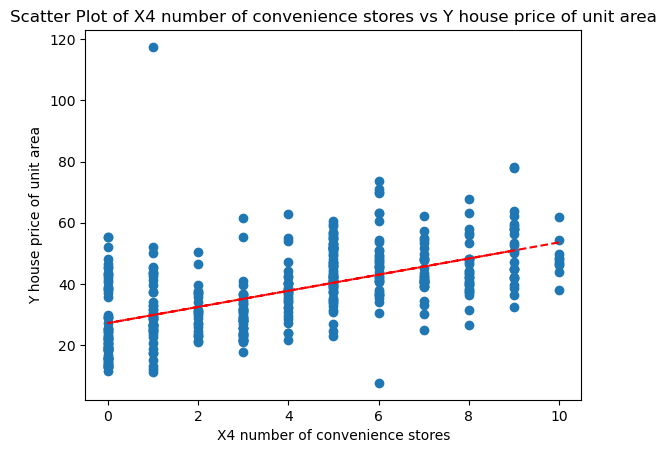

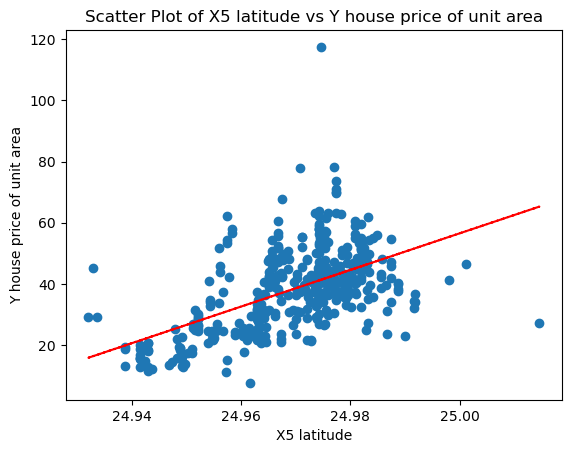

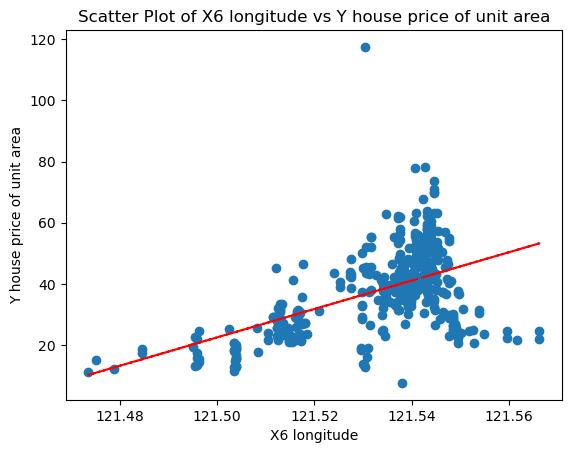

In [97]:
# lets check how every data affect on price unit
for i in df :
    if i != 'Y house price of unit area' :
        plt.scatter(df[i],df['Y house price of unit area'])
        m, b = np.polyfit(df[i], df['Y house price of unit area'], 1)
        plt.plot(df[i], m * df[i] + b, linestyle='--', color='red')
        plt.title(f'Scatter Plot of {i} vs Y house price of unit area')
        plt.xlabel(i)
        plt.ylabel('Y house price of unit area')
        plt.show()

Setelah diteliti lebih jauh, terdapat 1 data yang selalu berada di luar area yang seharusnya. hal tersebut dappat terlihat pada data house price diatas 100. Dalam rangka memperbesar nilai akurasi, kami memutuskan untuk menghilangkan nilai tersebut

In [98]:

df = df[df['Y house price of unit area'] < 100]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            413 non-null    float64
 1   X3 distance to the nearest MRT station  413 non-null    float64
 2   X4 number of convenience stores         413 non-null    int64  
 3   X5 latitude                             413 non-null    float64
 4   X6 longitude                            413 non-null    float64
 5   Y house price of unit area              413 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


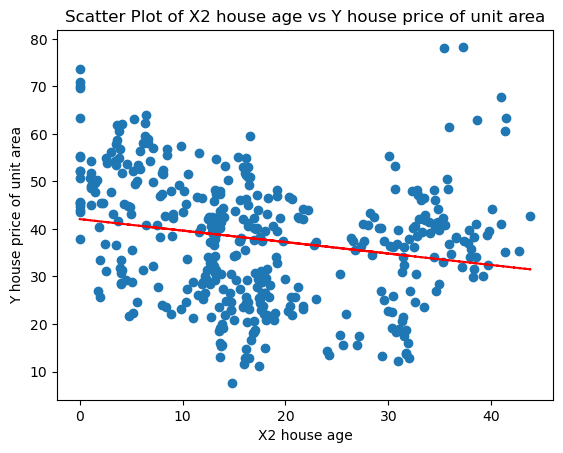

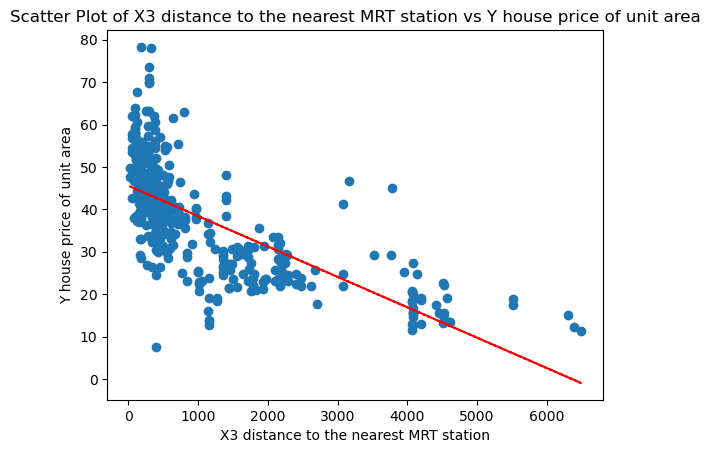

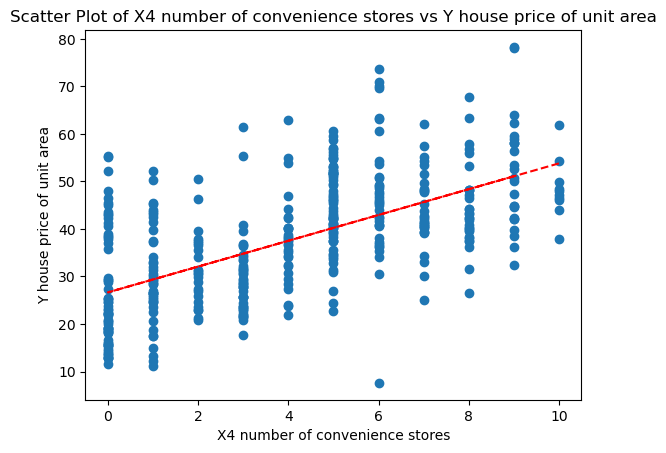

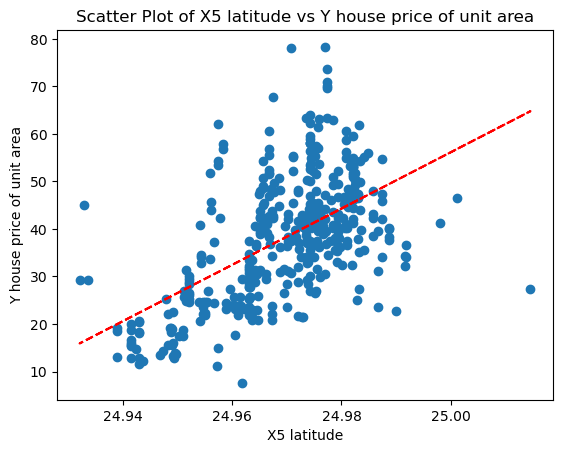

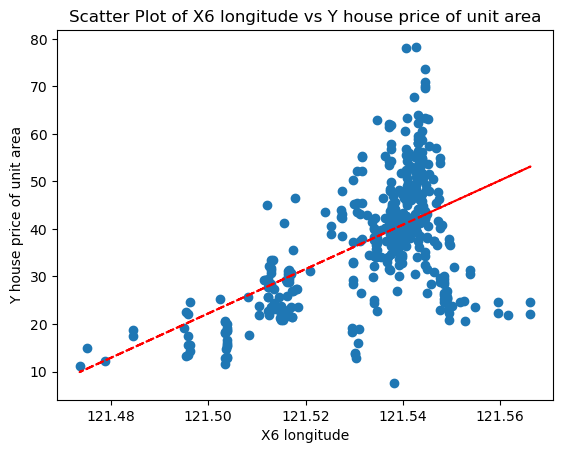

In [99]:
#Pemeriksaan ulang
for i in df :
    if i != 'Y house price of unit area' :
        plt.scatter(df[i],df['Y house price of unit area'])
        m, b = np.polyfit(df[i], df['Y house price of unit area'], 1)
        plt.plot(df[i], m * df[i] + b, linestyle='--', color='red')
        plt.title(f'Scatter Plot of {i} vs Y house price of unit area')
        plt.xlabel(i)
        plt.ylabel('Y house price of unit area')
        plt.show()

In [100]:
df.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.024676,0.048131,0.055119,-0.048822,-0.210985
X3 distance to the nearest MRT station,0.024676,1.000000,-0.605328,-0.590805,-0.807079,-0.694009
X4 number of convenience stores,0.048131,-0.605328,1.000000,0.445994,0.449239,0.612635
X5 latitude,0.055119,-0.590805,0.445994,1.000000,0.413249,0.563954
X6 longitude,-0.048822,-0.807079,0.449239,0.413249,1.000000,0.549250
Y house price of unit area,-0.210985,-0.694009,0.612635,0.563954,0.549250,1.000000


Dari relasi diatas, dapat terlihat bahwa pada variable x3 (jarak ke MRT terdekat), memiliki korelasi yang sangat besar. Hal ini sekaligus menjelaskan bahwa jarak dengan MRT terdekat akan menjadi faktor yang memberikan pengaruh terbesar terhadap variasi harga

In [101]:
# Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [102]:
print("x : ",x.shape)
print("y : ",y.shape)
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x :  (413, 5)
y :  (413,)
x_train :  (309, 5)
x_test :  (104, 5)
y_train :  (309,)
y_test :  (104,)


In [103]:
model = LinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

mae = mean_absolute_error(y_test,predict)
mse = mean_squared_error(y_test,predict)
r2 = r2_score(y_test,predict)

print('Mae : ',mae)
print('Mse : ',mse)
print('R2 : ',r2)

Mae :  5.99881979065391
Mse :  68.22157947356958
R2 :  0.5407072182170007


In [105]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)

In [106]:
mae = mean_absolute_error(y_test,y_pred_dt)
mse = mean_squared_error(y_test,y_pred_dt)
r2 = r2_score(y_test,y_pred_dt)

print('Mae : ',mae)
print('Mse : ',mse)
print('R2 : ',r2)

Mae :  5.793429487179487
Mse :  67.67942574786323
R2 :  0.5443571966366612


In [107]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=250, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

In [108]:
mae = mean_absolute_error(y_test,y_pred_rf)
mse = mean_squared_error(y_test,y_pred_rf)
r2 = r2_score(y_test,y_pred_rf)

print('Mae : ',mae)
print('Mse : ',mse)
print('R2 : ',r2)

Mae :  4.848410102258866
Mse :  46.180091222117234
R2 :  0.6890986294356298


In [109]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=150, random_state=42)
model_mlp.fit(x_train, y_train)
y_pred_mlp = model_mlp.predict(x_test)

c:\Users\Furion\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [110]:
mae = mean_absolute_error(y_test,y_pred_mlp)
mse = mean_squared_error(y_test,y_pred_mlp)
r2 = r2_score(y_test,y_pred_mlp)

print('Mae : ',mae)
print('Mse : ',mse)
print('R2 : ',r2)

Mae :  5.857197053722836
Mse :  71.99102773431949
R2 :  0.5153299051904436


In [111]:
import pickle
pickle.dump(model_rf,open('model.sav','wb'))